<a href="https://colab.research.google.com/github/RockyZhenXiang/2020-ME-548/blob/master/ME_548_Hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 548 20sp hw0 due 5p Fri Apr 3 on Canvas

This assignment will be graded on participation; so long as you make an effort on each problem and upload a legible pdf to Canvas, you will receive full credit.

**Important:** before you do any work in this Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas from this Colaboratory notebook, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" (on OSX) or "Microsoft Print to PDF" (on Windows) as your printer.

# logistics

***Purpose:*** *provide feedback so we can better support your learning; graded solely on participation.*

a. Approximately how many hours did you spend on this assignment?

A: Around 10 hours

b. Were there specific problems that took much longer than others?

A: The most difficult part is (b), because it is the first problem needed to coding.

c. What class meeting(s) did you participate in this week?
    
A: I participated the online zoom meeting on Tuesday 

d. What timezone(s) were you working in this week?
    
A: I will spend my quarter at Taiwan, which is at UTC+8. It is 15 hours ahead of Seattle.

# welcome to Linear Multivariable Control

***Purpose:*** *learn more about your background and goals so we can better support your learning; graded solely on participation.*

a. What were you doing before you enrolled in your current degree program?

A: Last year, I was studing for a bachelor degree in National Taiwan University before enrolled in master of mechanical engineering at UW. Also I serverd in mandatory military in between those two experience.

b. What do you want to do after you graduate?

A: I am planning to be a engineer after graduate. 
  If possible, I will like to do something related to sport or biomechanics.

c. Why did you enroll in this course?

  A: I feel like this is one of the fundamental course in control, so I wnat to learn it. 

d. What do you want to learn in this course?

  A: Honestly, I am not so fimilar with the content of the course, 
   so I will say I am happy to learn anything from the course if it is new for me.

e. Where did you take graduate-level linear systems theory (547), and what textbook(s) did you use?

  A: I took ME 547 in the last quarter. There is a reference textbook 
  Linear Systems Theory and Design (4th Ed) by Chi-Tsong Chen, 
   but the insturctor basicly used his note in teaching. 

f. What is/are your preferred scientific computing tool(s)?  (e.g. Python, Julia, Matlab, ...)

  A: I am most fimilar with Matlab, most of the courses I took required us using Matlab to finish homeworks. 
  As for Python, I had participated an online course.

g. Log in to Canvas and edit your Profile; add a headshot photo, specify your preferred name and pronouns.  (see my example at https://canvas.uw.edu/about/3510568)

***Bonus:*** record a video using [Panopto](https://itconnect.uw.edu/learn/tools/panopto/) to answer the questions above and introduce yourself to us and your classmates -- see [Prof Burden's introduction video](https://uw.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=5dd66c10-c623-46da-9411-ab8d01659996) for an example.

# simulation, linearization, visualization

Consider the following continuous-time nonlinear system (CNL) that models a pendulum comprised of a mass $m$ affixed to the end of a massless rigid rod of length $\ell$ whose other end is pinned to a direct-drive DC motor that applies torque $u$ and generates [back-EMF](https://en.wikipedia.org/wiki/Counter-electromotive_force) with constant $b$:
$$m \ell^2 \ddot{q} + m g \sin q = u - b \dot{q}.$$

***Purpose:***  *learn how to simulate a nonlinear system, linearize a nonlinear system at an equilibrium, and compare simulation results from the nonlinear system and its linearization -- these are foundational techniques we will use extensively throughout the quarter.*

###(a)
 *If a constant input torque $u(t) = u_0$ with $|u_0| < m g$ is applied, (CNL) has two equilibria -- in what follows, we will focus on the equilibrium in the angle range $\pm\frac{\pi}{2}$ and denote the equilibrium angle by $q_0(u_0)$.*
***Give an analytic expression for $q_0(u_0)$.***

### Answer(a):
For equilibrium, the system is not moveing. Thus, both $\dot{q}$ and $\ddot{q}$ = 0. By apply this condition and $q_0(u_0)$, the equation become:
$$ mgsin(q_0(u_0)) = u_0$$
By rearrenging the equation, $q_0(u_0)$ can be expressed as:
$$ q_0(u_0) = \arcsin(\frac{u_0}{mg})$$


###(b)  
*Verify your answer from (a) for $u_0 = \frac{1}{2} m g\ \text{N}$ by simulating (CNL) from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$ -- use parameter values $m = 1\ \text{kg}$, $\ell = 1\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $b = 1$.*
***Plot $q$ and $\dot{q}$ versus time, and (separately) plot $\dot{q}$ versus $q$ -- label the axes and include a legend in both plots.***

### Answer (B):
The ODE can be written as 
$$ m\ell^2\ddot{q} + b\dot{q}+mg\sin q = u $$

$$ \ddot{q} = \frac{u}{m \ell^2}-\frac{b\dot{q}}{m \ell^2}-\frac{g\sin q}{\ell^2} $$

By using the code provided below, the plots are:

![alt text](https://drive.google.com/uc?id=1S9E-Tq2eXfvGQpSx-0jVxwHTcuKc-6eA)
![alt text](https://drive.google.com/uc?id=1yTq931fOqJRo37-6eqs6zSE3a5SHb9da)

By caculation, $q_0 = 0.5236 $, which satisifies our simulation




In [0]:
g, l, b, m = 9.81, 1, 1, 1
# define dynamic system
def f(t,x,u):
  """
  x is a 2*1 vector
  u is a 1*1 number
  outupt is a 2*1 vector
  """
  q,dq = x[0], x[1]
  return np.hstack([dq,(u/(m*l**2))-(b*dq/(m*l**2))-(g*np.sin(q)/l**2)])

In [0]:
# set inital condition and input
x0 = np.array([0, 0])
u0 = 0.5*m*g

In [0]:
# run simulation
dt = 1e-2 # coarse timestep
t = 4*(g/l)**0.5
sim = simulation_SISO
t_,x_ = sim(f,t,x0,u0)

In [33]:
# caculate q0
q0 = np.arcsin(u0/(m*g))
print(q0)

0.5235987755982989


In [0]:
# plot q and dq versus time
fig = plt.figure(figsize = (10,5))
plt.plot(t_,x_[:,0], label = "q");
plt.plot(t_,x_[:,1], label = "dq");
plt.title("q and dq versus time")
plt.ylabel("Value")
plt.xlabel("Time")
plt.legend()

In [0]:
# plot q verses dq
fig = plt.figure(figsize = (10,5))
plt.plot(x_[:,0],x_[:,1], label = "q");
plt.title("q versus dq")
plt.ylabel("dq")
plt.xlabel("q")

###(c) 
*Verify your answer from (a) for $u_0 \in \left( \frac{1}{4} m g, \frac{3}{4} m g \right)$ by simulating (CNL) from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$; let $q(t;u_0)$ denote the angle returned by the simulation at the final time $t$.*
***Plot $q(t;u_0)$ versus $u_0$ and $q_0(u_0)$ versus $u_0$ -- label the axes and include a legend.***
###Answer(c)
![alt text](https://drive.google.com/uc?id=1VT76fw1E_ju7WAFBkF1RV3eEqH2pXGSf)

![alt text](https://drive.google.com/uc?id=1aukxXI9ngeTlln0dddtE4qNWyY22jZPd)

In [0]:
# set inital condition and input
x0 = np.array([0, 0])
u = np.linspace(0.25*m*g, 0.75*m*g,50)

In [0]:
# run simulation
q = []

for i in range(50):
  dt = 1e-2 # coarse timestep
  t = 4*(g/l)**0.5
  u0 = u[i]
  sim = simulation_SISO
  t_,x_ = sim(f,t,x0,u0)
  q.append(x_[-1])


In [0]:
# caculate q0
q0 = np.arcsin(u/(m*g))


Text(0.5, 0, 'u0')

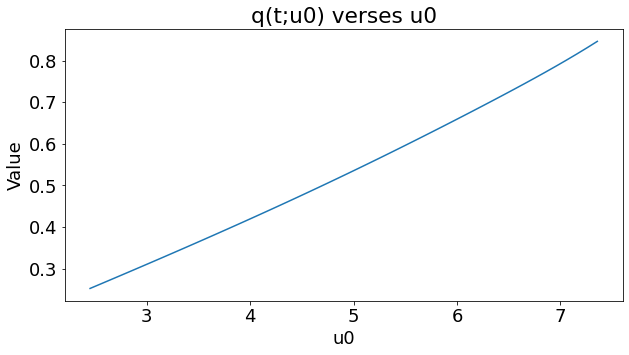

In [37]:
# plot q(t;u0) verses u0
fig = plt.figure(figsize = (10,5))
plt.plot(u,np.array(q)[:,0], label = "q");
plt.title("q(t;u0) verses u0")
plt.ylabel("Value")
plt.xlabel("u0")

In [0]:
# plot q0 verses u0
fig = plt.figure(figsize = (10,5))
plt.plot(u,q0, label = "q");
plt.title("q0 verses u0")
plt.ylabel("Value")
plt.xlabel("u0")

###(d)
 *Linearize (CNL) about the equilibrium $x_0$ from (a) to obtain a continuous-time linear time-invariant system (CLTI)
$$\delta\dot{x} = A(u_0) \delta x + B(u_0) \delta u$$
that approximates (CNL) when $x \approx x_0 + \delta x$, $u \approx u_0 + \delta u$.*
***Give analytic expressions for $A(u_0)$, $B(u_0)$.***

###Answer (d)
From observation, the ODE only have a nonlinear term, $\sin(q)$. Thus, I will use Taylar expansion to linearlize this term around the equilibrium point, $q_0(u_0) = \arcsin(\frac{u_0}{mg})$. By this, we get 
$$\sin(q) \approx \sin(q_0) + \cos(q_0)(q-q_0)$$

Since $q_0 = \arcsin(\frac{u_0}{mg})$, the previous equation can be witten as:
$$\sin(q) \approx \frac{u_0}{mg} + \cos(q_0)(q-q_0)$$

Take $q = q_0+\delta q$ to repesent small oscillation, the ODE turns into:
$$ m\ell^2{\delta\ddot{q}}^2+b\delta\dot{q}+mg \cos(q_0)\delta q = u-u_0 $$

Assume $x = [q, \dot{q}]$,  $x \approx x_0 + \delta x$, $u \approx u_0 + \delta u$, the system can be written in the following matrix from
$$ \delta\dot{x}
 =
  \begin{bmatrix}
   0  &   1 \\
   -\frac{g}{\ell^2}\cos(\arcsin(\frac{u_0}{mg})) & -\frac{b}{m\ell^2} 
   \end{bmatrix} \delta x
   +
   \begin{bmatrix}
   0\\
   \frac{1}{m\ell^2}
   \end{bmatrix} \delta u
$$



###(e)
 If a constant $\delta u(t) = \delta u_0$ is applied, (CLTI) has one equilibrium, denoted $\delta x_0(\delta u_0)$.
***Give an analytic expression for $\delta x_0(\delta u_0)$.***
### Answer (e)
For equilibrium, $\dot{x} = \ddot{x} = 0$. Thus, the ODE can be written as 
$$ 0
 =
  \begin{bmatrix}
   0  &   1 \\
   -\frac{g}{\ell^2}\cos(\arcsin(\frac{u_0}{mg})) & -\frac{b}{m\ell^2} 
   \end{bmatrix} 
   \begin{bmatrix} \delta x_0(u_0) \\ 0 \end{bmatrix}
   +
   \begin{bmatrix}
   0\\
   \frac{1}{m\ell^2}
   \end{bmatrix} \delta u_0
$$

The only equation left is:
$$ \frac{\delta u_0}{m} = g\cos(\arcsin(\frac{u_0}{mg}))\delta x_0(u_0)$$

After rearrangment, we get:
$$\delta x_0(u_0) = \frac{\delta u_0}{mg\cos(\arcsin(\frac{u_0}{mg}))} $$

###(f) 
*Verify your answer from (e) by simulating (CLTI) with $u_0 = \frac{1}{2} m g\ \text{N}$, $\delta u_0 = \frac{1}{4} m g\ \text{N}$ from initial condition $\delta x(0) = 0$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$.*
***Plot $\delta x$ and $\delta x_0(\delta u_0)$ versus time -- label the axes and include a legend.***

###Answer (f)
![alt text](https://drive.google.com/uc?id=1wL1Elq_1S65IRdEXNhqOqClntycvsfL7)

In [0]:
g, l, b, m = 9.81, 1, 1, 1
# define dynamic system
def flinear(t,x,u0,du0):
  """
  x is a 2*1 vector ;
  u0 is a 1*1 number, preinput ;
  du0 is the input ;
  outupt is a 2*1 vector ;
  """
  q,dq = x[0], x[1]
  return np.hstack([dq,(du0/(m*l**2))-(b*dq/(m*l**2))-(g*np.cos(np.arcsin(u0/(m*g)))*q/l**2)])

In [0]:
# set inital condition and input
x0 = np.array([0, 0])
du0 = 0.25*m*g    #input
u0 = 0.5*m*g      #preinput

In [0]:
# run simulation
dt = 1e-4 # coarse timestep
t = 4*(g/l)**0.5
sim = simulation_Linear
t_,x2_ = sim(flinear,t,x0,u0,du0)

In [19]:
# caculate dx0
dx0 = du0/(m*g*np.cos(np.arcsin(u0/(m*g))))
print(dx0)
dx0_ = np.ones(125284)*dx0

0.2886751345948129


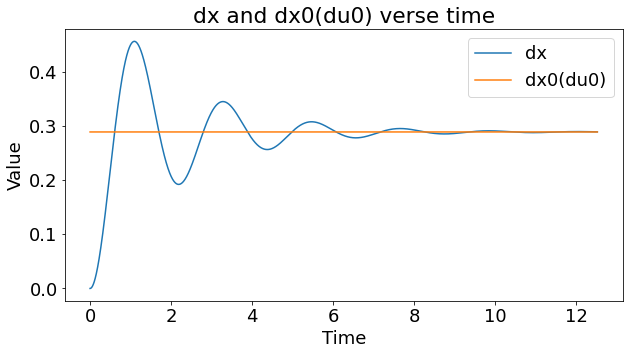

In [20]:
# plot dx and dx0(du0) verse time
fig = plt.figure(figsize = (10,5))
plt.plot(t_,x2_[:,0], label = "dx");
plt.plot(t_,dx0_, label = "dx0(du0)");
plt.title("dx and dx0(du0) verse time")
plt.ylabel("Value")
plt.xlabel("Time")
plt.legend()

###(g) 
*Simulate (CLTI) with $u_0 = \frac{1}{2} m g\ \text{N}$, $\delta u_0 \in \left( -\frac{1}{4} m g, +\frac{1}{4} m g \right)$ from initial condition $\delta x(0) = 0$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$ and compare with the result obtained in (c); let $\delta q(t;\delta u_0)$ denote the angle returned by the simulation at the final time $t$.*
***Plot $q_0(u_0) + \delta q_0(\delta u_0)$ versus $u_0 + \delta u_0$ on the plot from (c) -- label the axes and include a legend.***

###Answer (g)
![alt text](https://drive.google.com/uc?id=1Cizp2IlugQJZeJiznM3e_fMp3KE5qZzO)

In [0]:
# set inital condition and input
x0 = np.array([0, 0])
du0 = np.linspace(-0.25*m*g, 0.25*m*g,50)
u0 = 0.5*m*g

In [0]:
# run simulation
ql = []

for i in range(50):
  dt = 1e-2 # coarse timestep
  t = 4*(g/l)**0.5
  du = du0[i] 
  sim = simulation_Linear
  t_,x2_ = sim(flinear,t,x0,u0,du)
  ql.append(x2_[-1])


In [0]:
# caculate q0(u0)
q0 = np.arcsin(u0/(m*g))

Text(0.5, 0, 'u0')

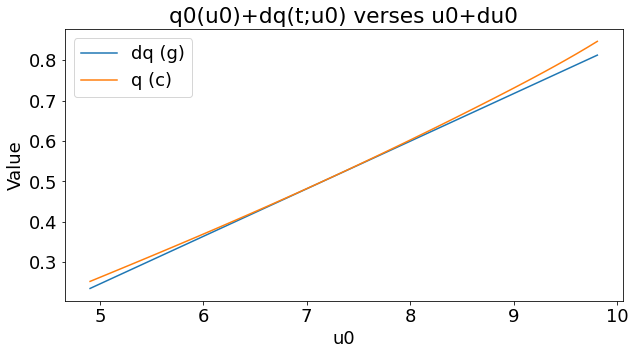

In [43]:
# plot q(t;u0) verses u0
fig = plt.figure(figsize = (10,5))
plt.plot(du0+u0,np.array(ql)[:,0]+q0, label = "dq (g)");
plt.plot(du0+u0,np.array(q)[:,0], label = "q (c)");
plt.title("q0(u0)+dq(t;u0) verses u0+du0")
plt.ylabel("Value")
plt.legend()
plt.xlabel("u0")

In [5]:
# Setups
%matplotlib inline
%pdb off
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

Automatic pdb calling has been turned OFF


In [0]:
def simulation_SISO(f,t,x0,u,dt = 1e-4,t0 = 0.):
  """
  f = system 
  u = input, type: np.array (float or function), 2*1
  t = simulation time
  dt = step
  x0 = initial state condition, type: np.array (float), n(rank)*1(input)
  t0 = starting time
  """

  t_,x_ = [t0],[x0]

  while t_[-1]+dt < t:
    _t,_x,_u = t_[-1], x_[-1],u
    dx = f(_t,_x,_u)*dt 
    x_.append(_x+dx)
    t_.append(_t+dt)
  return np.asarray(t_), np.asarray(x_)


In [0]:
def simulation_Linear(flinear,t,x0,u0,du0,dt = 1e-4,t0 = 0.):
  """
  flinear = system 
  u = preinput, type: np.array (float or function), 2*1
  du0 = input
  t = simulation time
  dt = step
  x0 = initial state condition, type: np.array (float), n(rank)*1(input)
  t0 = starting time
  """

  t_,x_ = [t0],[x0]

  while t_[-1]+dt < t:
    _t,_x = t_[-1], x_[-1]
    dx = flinear(_t,_x,u0,du0)*dt 
    x_.append(_x+dx)
    t_.append(_t+dt)
  return np.asarray(t_), np.asarray(x_)